In [1]:
import pandas as pd
import statsmodels.api as sm
df_math= pd.read_csv("train-student-mat.csv")
df= pd.read_csv("train-student-por.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# object 타입인 열에 대해 라벨 인코딩 수행
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print(df)


     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   18        1        0        0     4     4     0     4   
1         0    0   17        1        0        1     1     1     0     2   
2         0    0   15        1        1        1     1     1     0     2   
3         0    0   15        1        0        1     4     2     1     3   
4         0    0   16        1        0        1     3     3     2     2   
5         0    1   16        1        1        1     4     3     3     2   
6         0    1   16        1        1        1     2     2     2     2   
7         0    0   17        1        0        0     4     4     2     4   
8         0    1   15        1        1        0     3     2     3     2   
9         0    1   15        1        0        1     3     4     2     2   
10        0    0   15        1        0        1     4     4     4     1   
11        0    0   15        1        0        1     2     1     3     2   
12        0 

In [9]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# object 타입인 열에 대해 라벨 인코딩 수행
for col in df_math.columns:
    if df_math[col].dtype == 'object':
        df_math[col] = label_encoder.fit_transform(df_math[col])

print(df_math)


     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0   18        1        0        0     4     4     0     4   
1         0    0   17        1        0        1     1     1     0     2   
2         0    0   15        1        1        1     1     1     0     2   
3         0    0   15        1        0        1     4     2     1     3   
4         0    0   16        1        0        1     3     3     2     2   
5         0    1   16        1        1        1     4     3     3     2   
6         0    1   16        1        1        1     2     2     2     2   
7         0    0   17        1        0        0     4     4     2     4   
8         0    1   15        1        1        0     3     2     3     2   
9         0    1   15        1        0        1     3     4     2     2   
10        0    0   15        1        0        1     4     4     4     1   
11        0    0   15        1        0        1     2     1     3     2   
12        0 

In [10]:
merged_df = pd.concat([df, df_math], axis=0)


print(merged_df.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0    0   18        1        0        0     4     4     0     4   
1       0    0   17        1        0        1     1     1     0     2   
2       0    0   15        1        1        1     1     1     0     2   
3       0    0   15        1        0        1     4     2     1     3   
4       0    0   16        1        0        1     3     3     2     2   

   reason  guardian  traveltime  studytime  failures  schoolsup  famsup  paid  \
0       0         1           2          2         0          1       0     0   
1       0         0           1          2         0          0       1     0   
2       2         1           1          2         0          1       0     0   
3       1         1           1          3         0          0       1     0   
4       1         0           1          2         0          0       1     0   

   activities  nursery  higher  internet  romantic  famrel  freetime

In [12]:
merged_df.shape

(1044, 31)

In [16]:
X=merged_df.drop(columns = ["G1","health","Dalc","Walc","internet","reason","Mjob","Medu","school","sex","age"])
y = merged_df["G1"]

In [24]:
# import lightgbm as lgb
# from sklearn.model_selection import KFold, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import MinMaxScaler

# # 데이터 준비
# # X는 특성, y는 타겟 변수(종속 변수)로 가정
# # 먼저, 전체 데이터를 min-max 스케일링합니다.
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # k-fold 교차 검증을 위해 데이터를 k개의 서브셋으로 나눕니다.
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # 하이퍼파라미터 그리드를 정의합니다.
# param_grid = {
#     'num_leaves': [30, 100 , 200],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'n_estimators': [100, 200, 300]
# }

# # GridSearchCV를 사용하여 최적의 하이퍼파라미터를 탐색합니다.
# grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
# grid_search.fit(X_scaled, y)

# # 최적의 하이퍼파라미터와 성능을 출력합니다.
# print("Best Parameters:", grid_search.best_params_)
# print("Best MSE:", -grid_search.best_score_)

# # 최적의 모델을 선택합니다.
# best_model = grid_search.best_estimator_

# # 각 폴드에 대해 모델을 학습하고 평가합니다.
# mse_scores = []
# r2_scores = []

# for train_index, test_index in kf.split(X_scaled):
#     X_train, X_test = X_scaled[train_index], X_scaled[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # 최적의 하이퍼파라미터로 모델 초기화 및 훈련
#     best_model.fit(X_train, y_train)

#     # 테스트 데이터에 대한 예측
#     y_pred = best_model.predict(X_test)

#     # 모델 평가
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     mse_scores.append(mse)
#     r2_scores.append(r2)

# # 교차 검증 결과 출력
# print("Mean Squared Error (MSE) for each fold:", mse_scores)
# print("Mean R-squared (R2) for each fold:", r2_scores)
# print("Average MSE:", sum(mse_scores) / len(mse_scores))
# print("Average R-squared:", sum(r2_scores) / len(r2_scores))


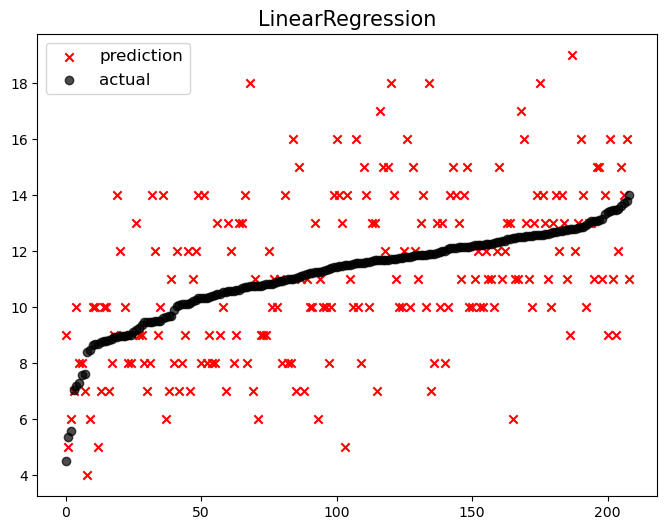

,model,error
0,RidgeClassifier,10.284615
1,Logi,8.938462
2,XGBRegressor,8.628548
3,LGBMRegressor_Tuning,8.225206
4,LGBMRegressor,8.169214
5,Stacking Ensemble,8.051110
6,Ridge(alpha=0.1),7.939306
7,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.926826
8,Voting Ensemble,7.886353
9,GradientBoostingRegressor_Tuning,7.833825


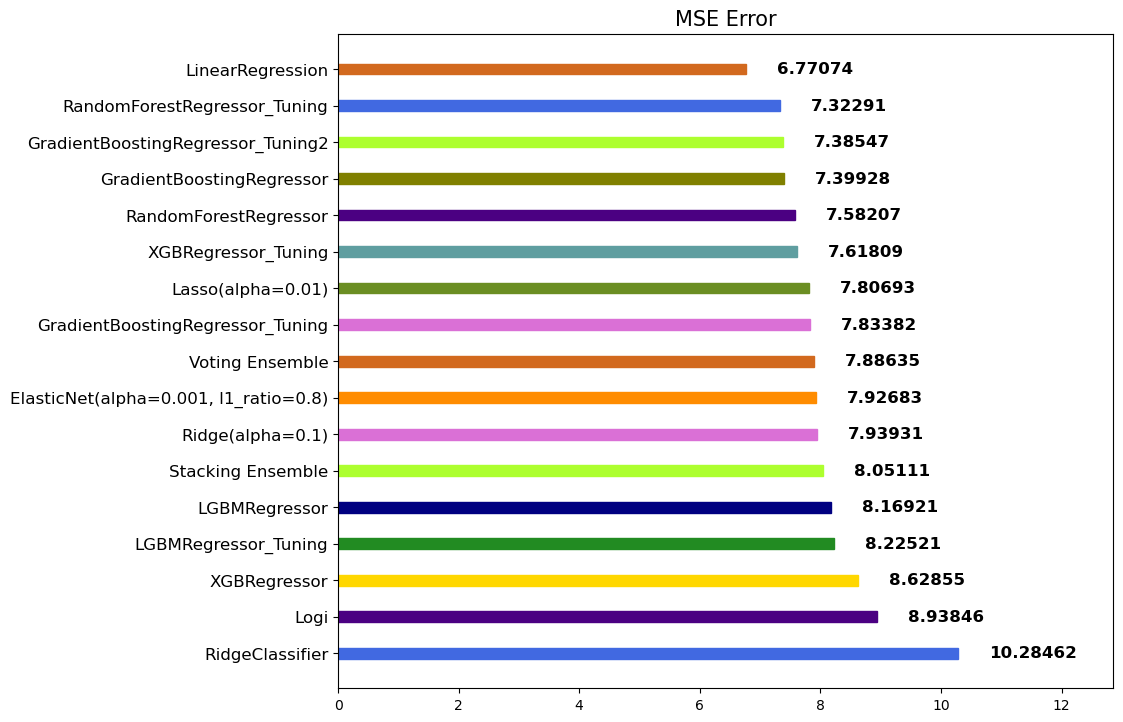

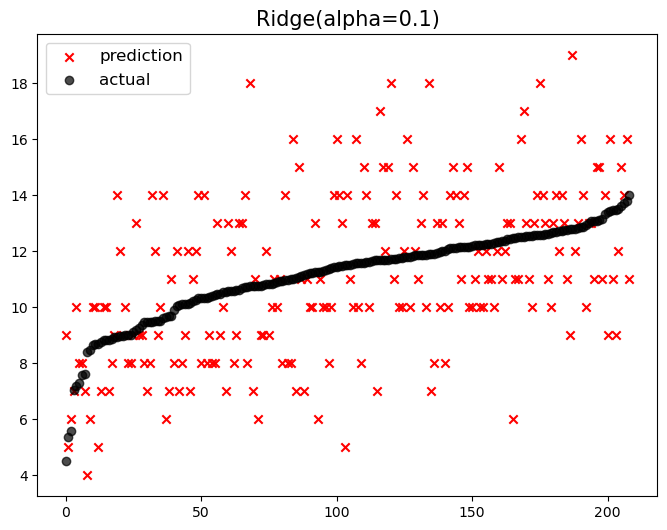

,model,error
0,RidgeClassifier,10.284615
1,Logi,8.938462
2,XGBRegressor,8.628548
3,LGBMRegressor_Tuning,8.225206
4,LGBMRegressor,8.169214
5,Stacking Ensemble,8.051110
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.926826
7,Voting Ensemble,7.886353
8,GradientBoostingRegressor_Tuning,7.833825
9,Lasso(alpha=0.01),7.806926


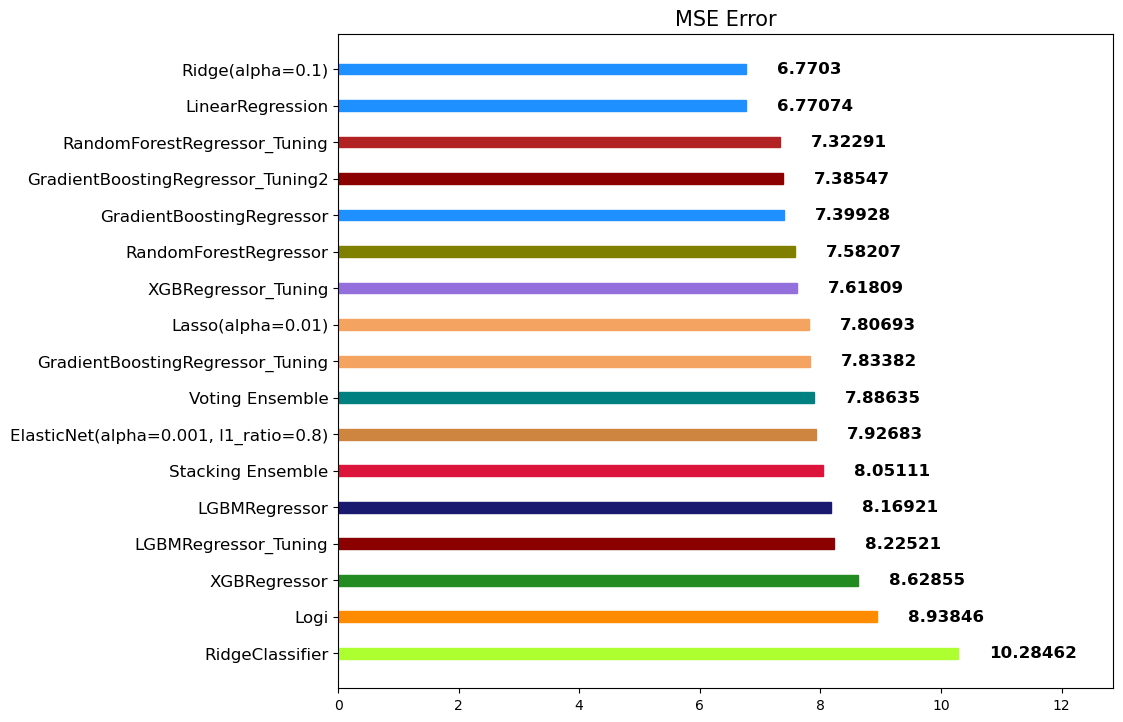

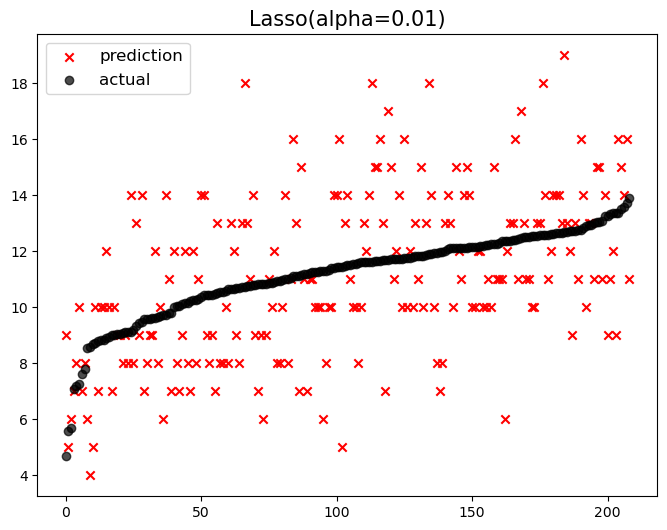

,model,error
0,RidgeClassifier,10.284615
1,Logi,8.938462
2,XGBRegressor,8.628548
3,LGBMRegressor_Tuning,8.225206
4,LGBMRegressor,8.169214
5,Stacking Ensemble,8.051110
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",7.926826
7,Voting Ensemble,7.886353
8,GradientBoostingRegressor_Tuning,7.833825
9,XGBRegressor_Tuning,7.618093


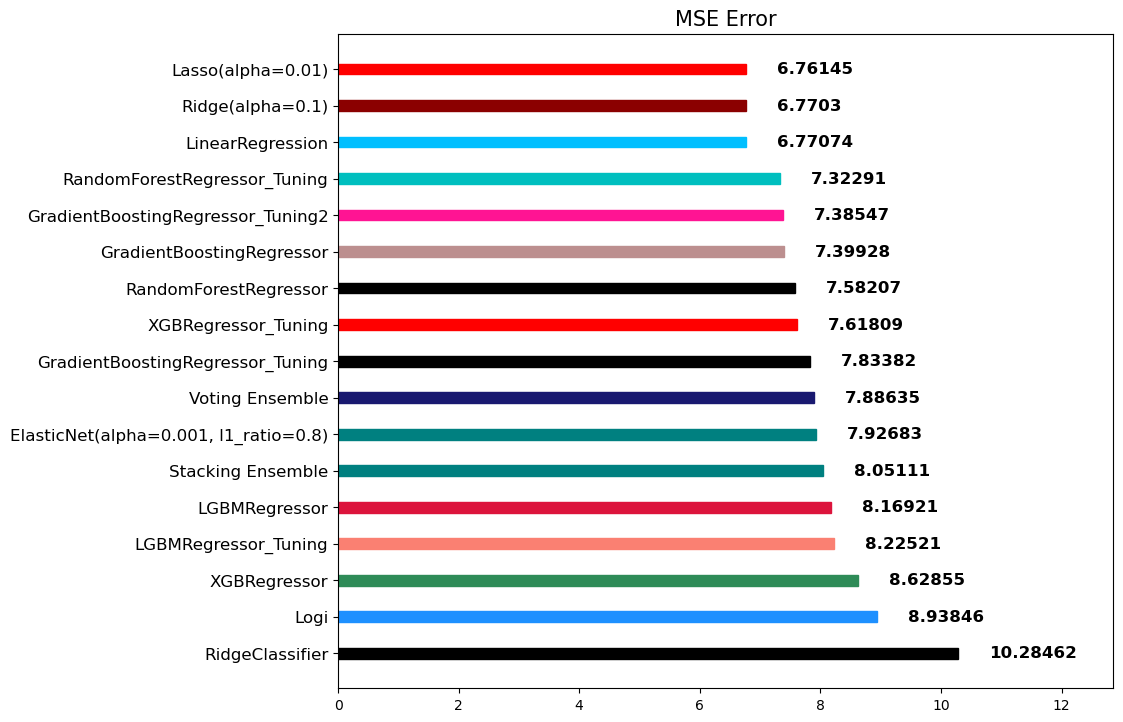

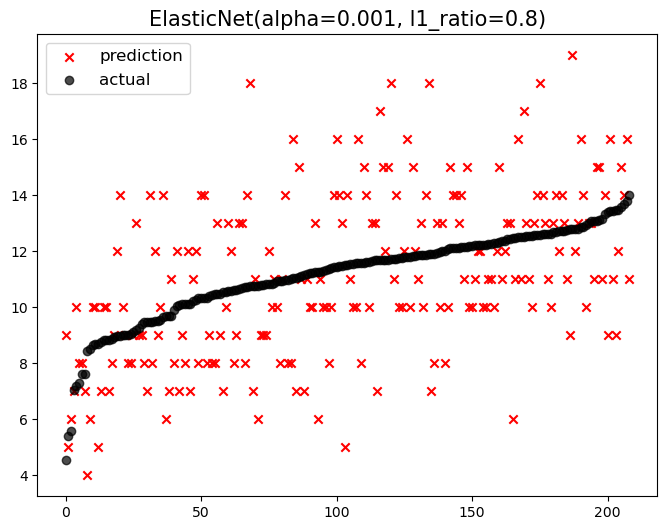

,model,error
0,RidgeClassifier,10.284615
1,Logi,8.938462
2,XGBRegressor,8.628548
3,LGBMRegressor_Tuning,8.225206
4,LGBMRegressor,8.169214
5,Stacking Ensemble,8.051110
6,Voting Ensemble,7.886353
7,GradientBoostingRegressor_Tuning,7.833825
8,XGBRegressor_Tuning,7.618093
9,RandomForestRegressor,7.582072


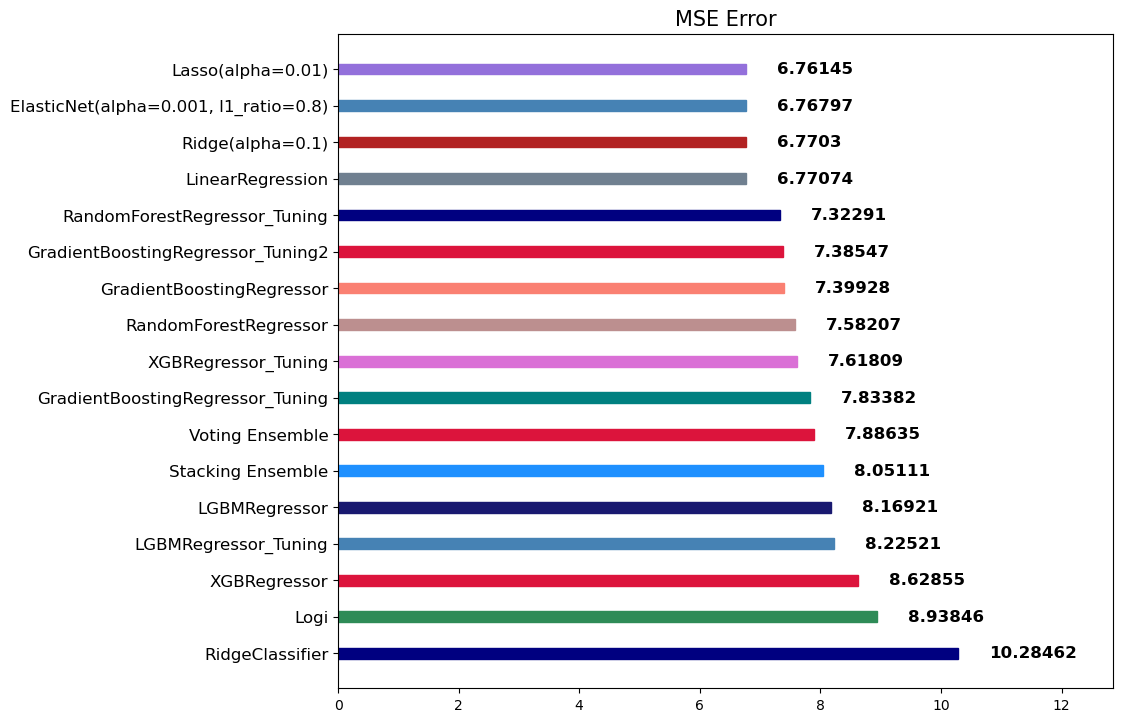

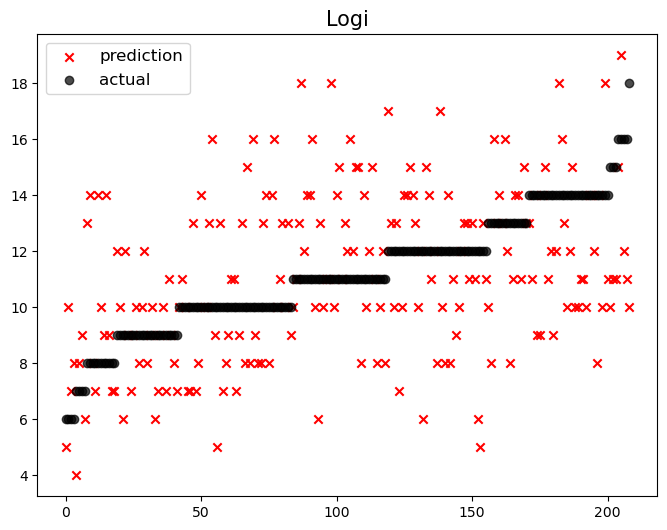

,model,error
0,RidgeClassifier,10.284615
1,Logi,8.641148
2,XGBRegressor,8.628548
3,LGBMRegressor_Tuning,8.225206
4,LGBMRegressor,8.169214
5,Stacking Ensemble,8.051110
6,Voting Ensemble,7.886353
7,GradientBoostingRegressor_Tuning,7.833825
8,XGBRegressor_Tuning,7.618093
9,RandomForestRegressor,7.582072


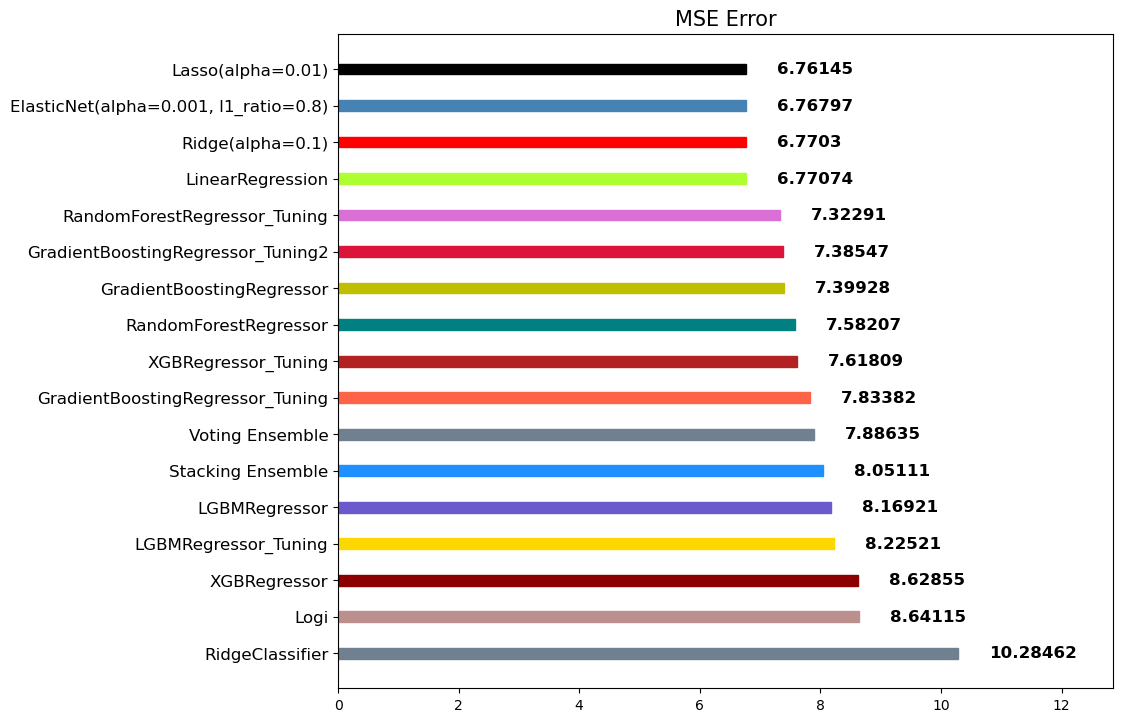

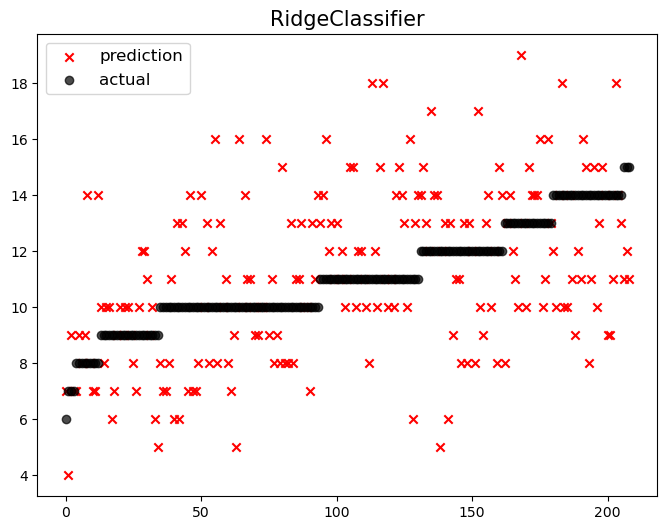

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,GradientBoostingRegressor_Tuning,7.833825
7,RidgeClassifier,7.746411
8,XGBRegressor_Tuning,7.618093
9,RandomForestRegressor,7.582072


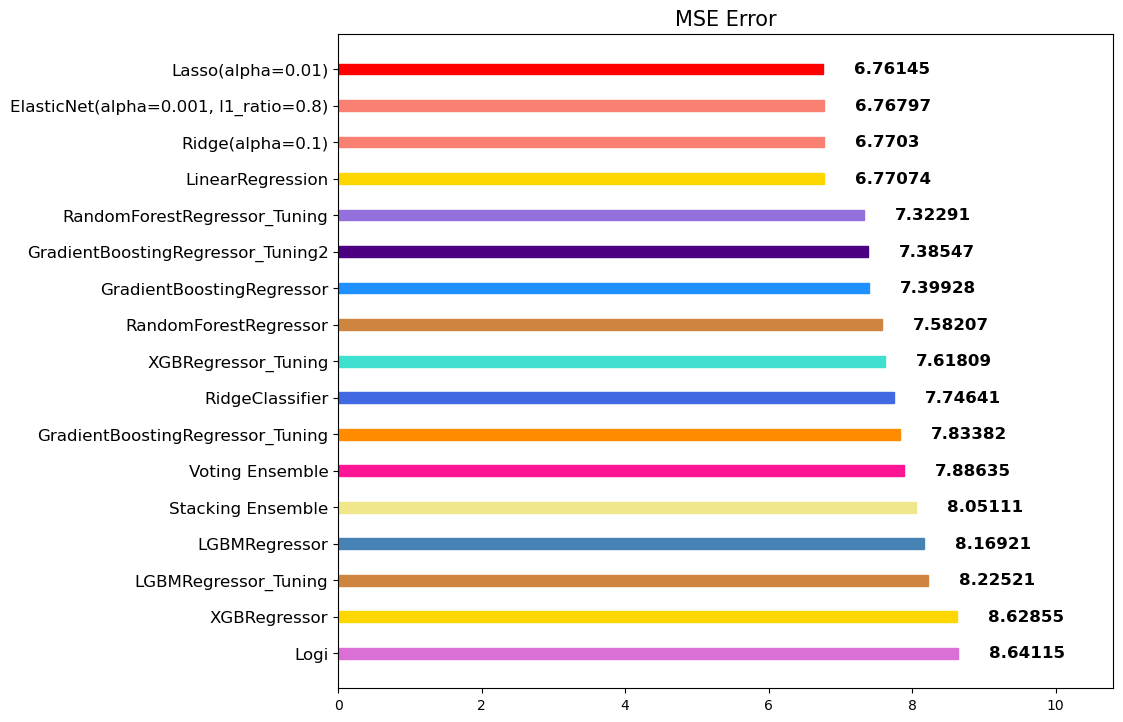

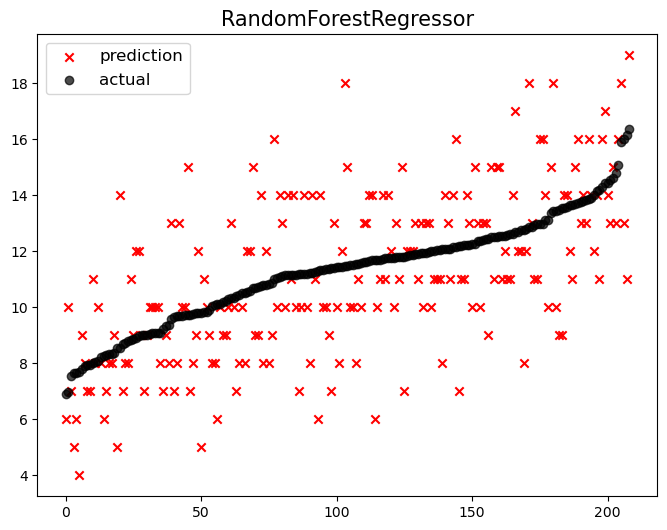

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,GradientBoostingRegressor_Tuning,7.833825
7,RidgeClassifier,7.746411
8,XGBRegressor_Tuning,7.618093
9,GradientBoostingRegressor,7.399276


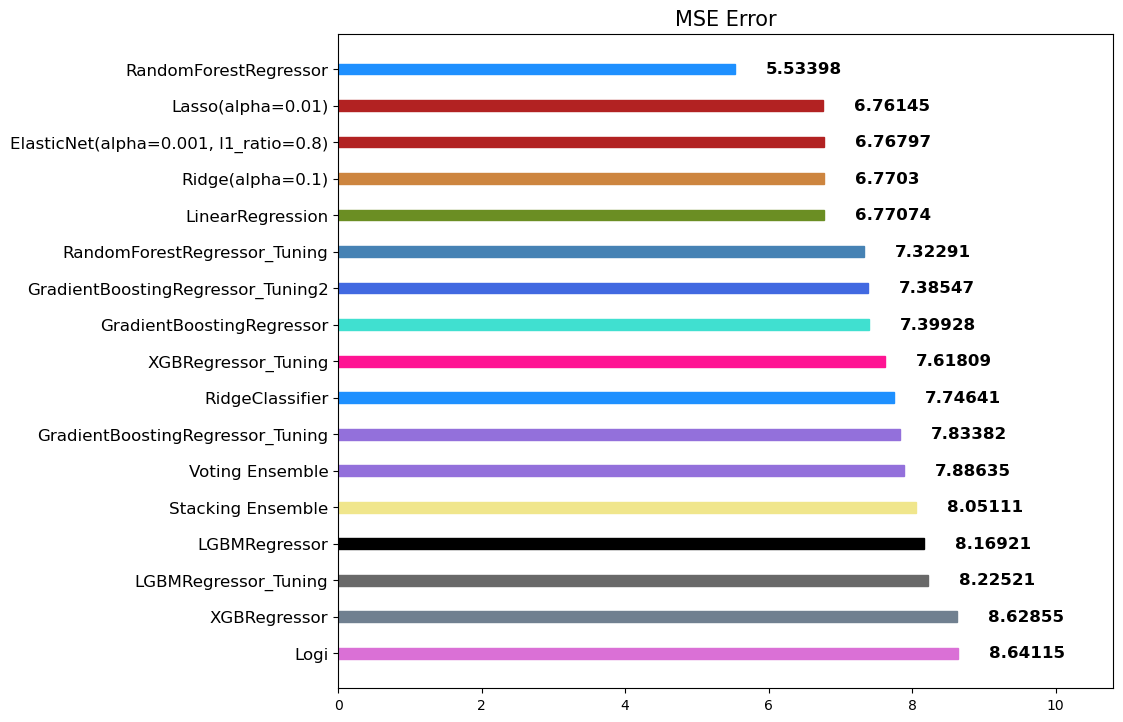

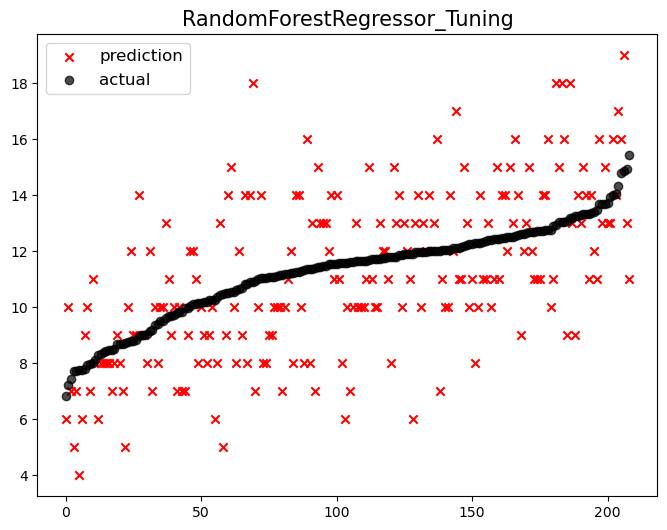

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,GradientBoostingRegressor_Tuning,7.833825
7,RidgeClassifier,7.746411
8,XGBRegressor_Tuning,7.618093
9,GradientBoostingRegressor,7.399276


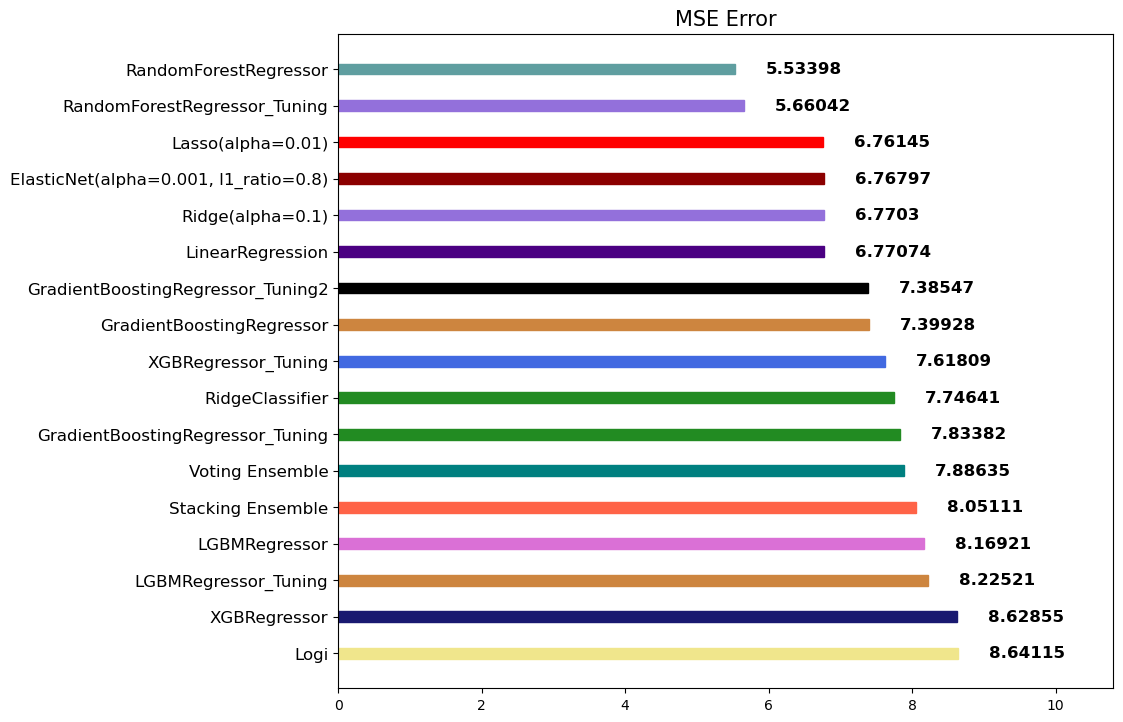

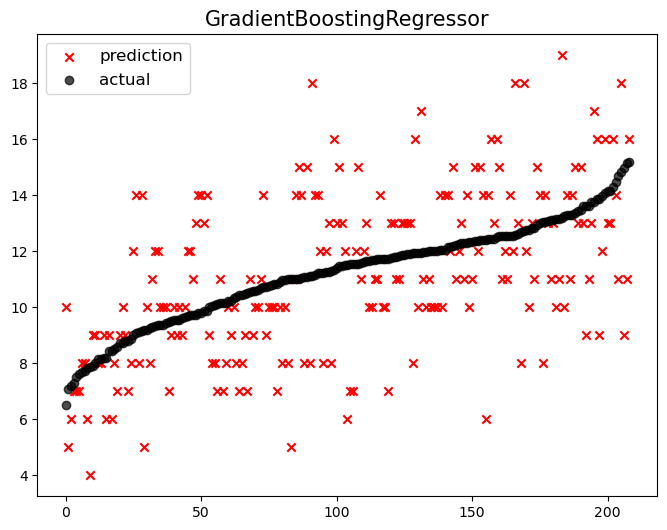

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,GradientBoostingRegressor_Tuning,7.833825
7,RidgeClassifier,7.746411
8,XGBRegressor_Tuning,7.618093
9,GradientBoostingRegressor_Tuning2,7.385473


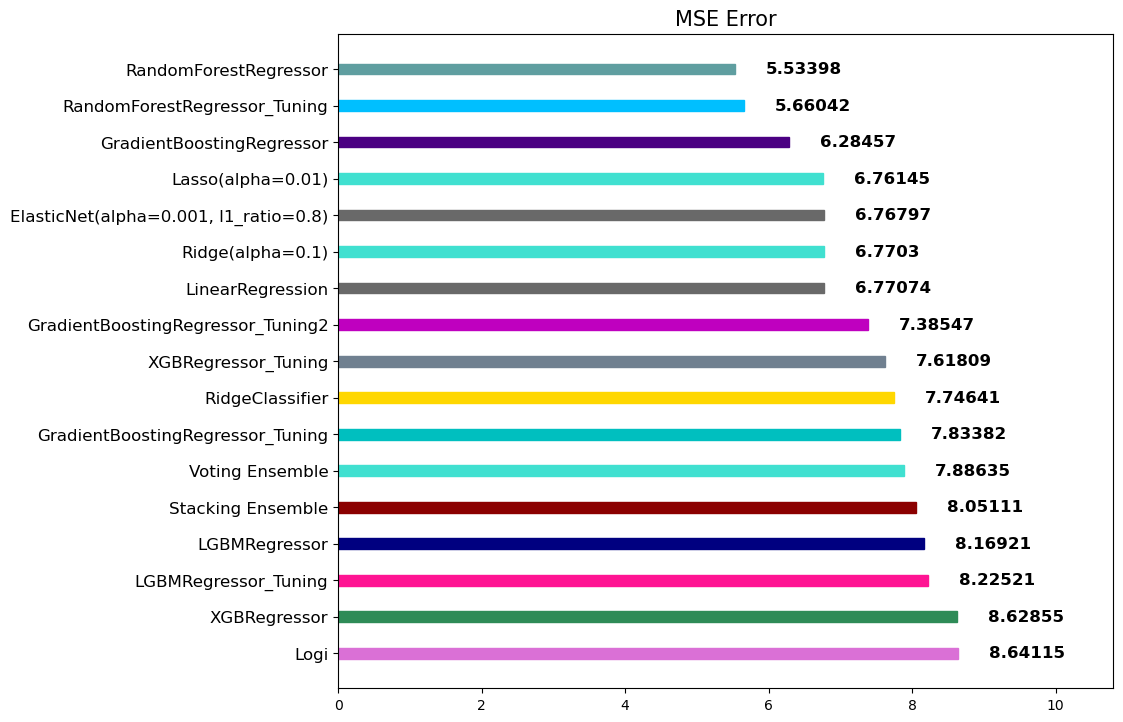

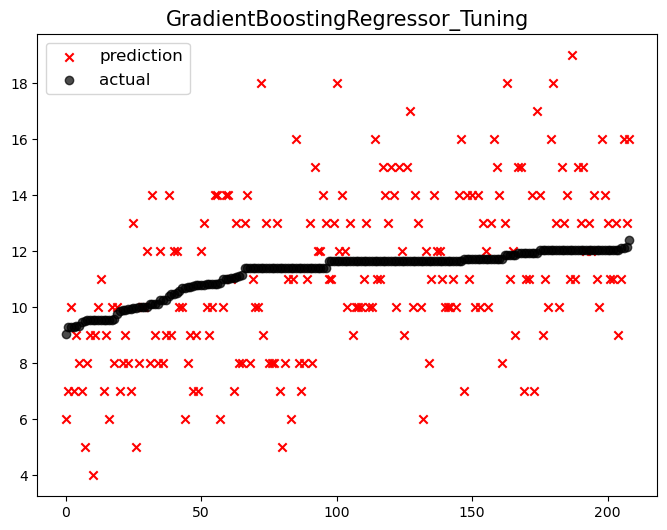

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,RidgeClassifier,7.746411
7,XGBRegressor_Tuning,7.618093
8,GradientBoostingRegressor_Tuning2,7.385473
9,GradientBoostingRegressor_Tuning,7.133920


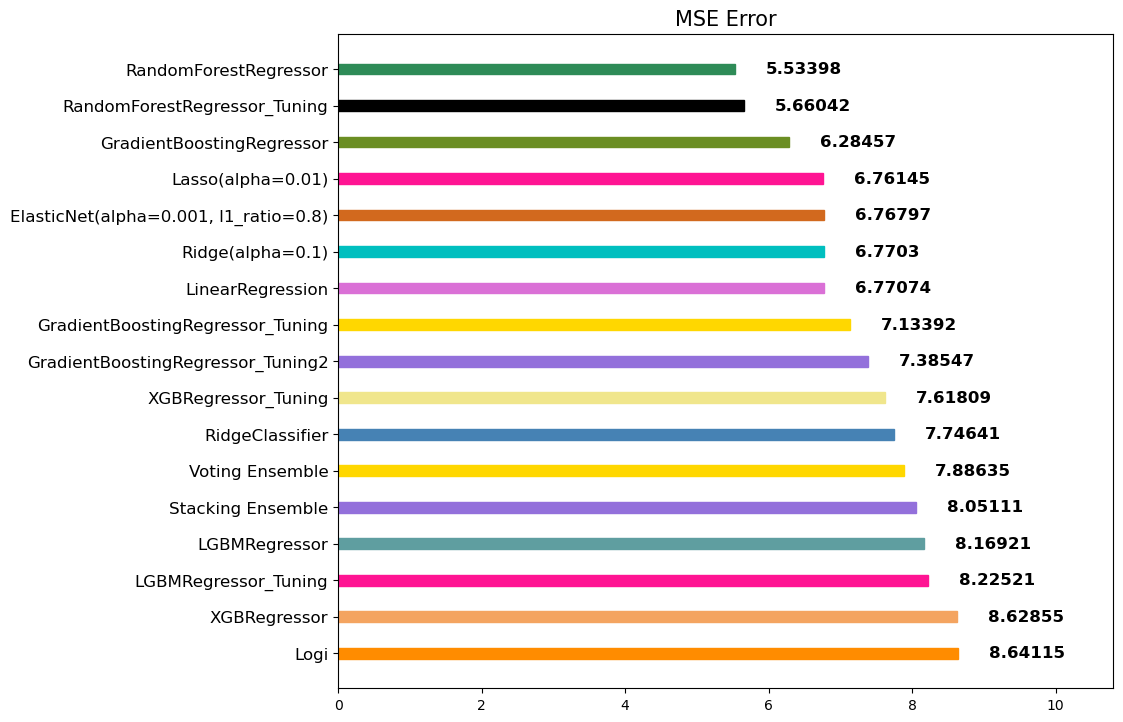

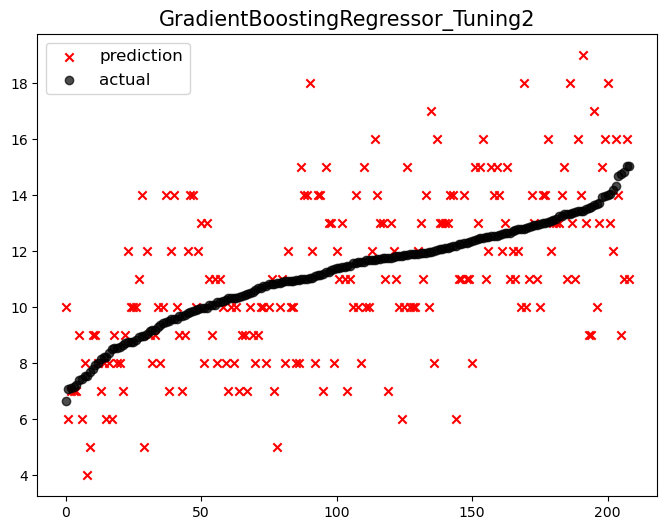

,model,error
0,Logi,8.641148
1,XGBRegressor,8.628548
2,LGBMRegressor_Tuning,8.225206
3,LGBMRegressor,8.169214
4,Stacking Ensemble,8.051110
5,Voting Ensemble,7.886353
6,RidgeClassifier,7.746411
7,XGBRegressor_Tuning,7.618093
8,GradientBoostingRegressor_Tuning,7.133920
9,LinearRegression,6.770742


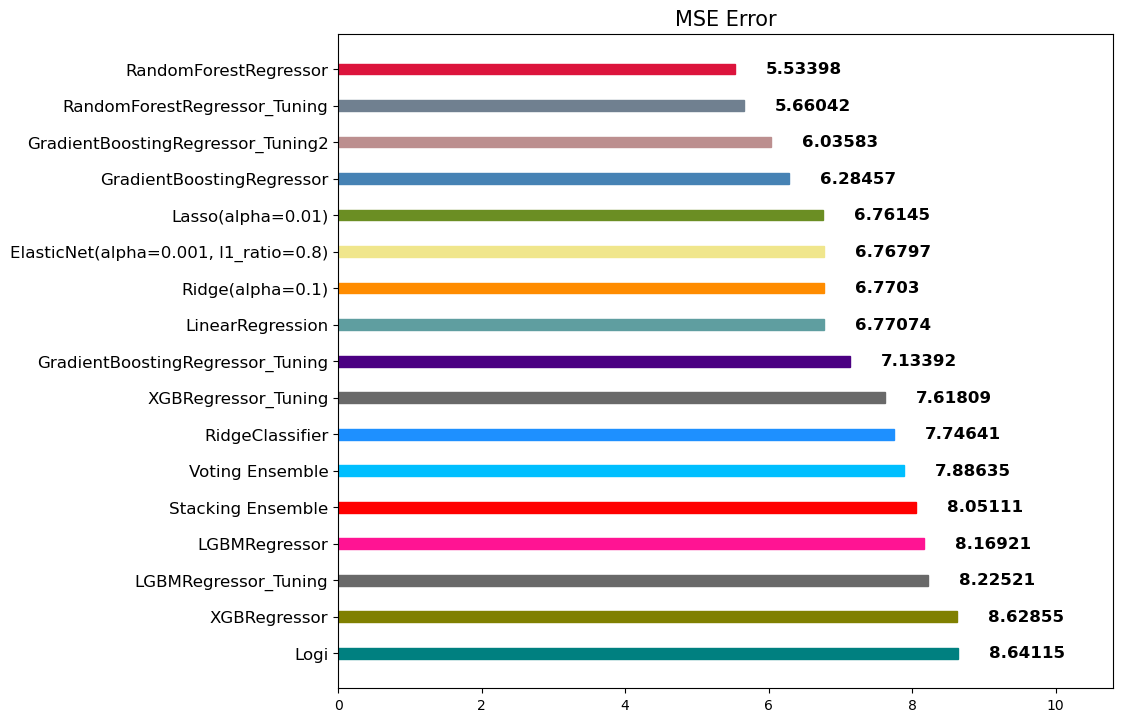

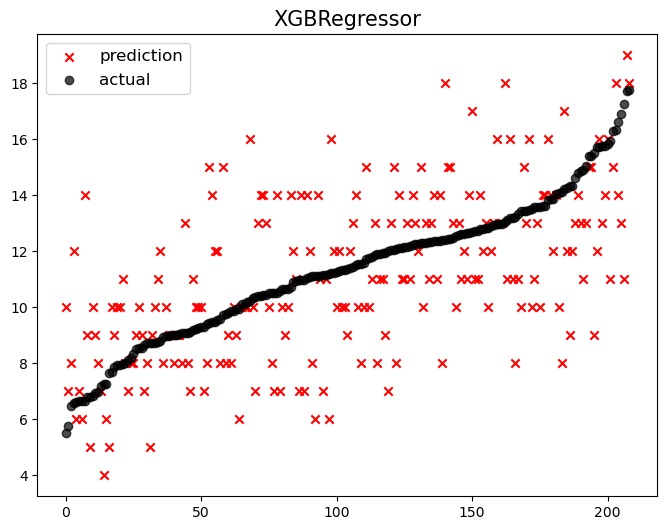

,model,error
0,Logi,8.641148
1,LGBMRegressor_Tuning,8.225206
2,LGBMRegressor,8.169214
3,Stacking Ensemble,8.051110
4,Voting Ensemble,7.886353
5,RidgeClassifier,7.746411
6,XGBRegressor_Tuning,7.618093
7,GradientBoostingRegressor_Tuning,7.133920
8,LinearRegression,6.770742
9,Ridge(alpha=0.1),6.770299


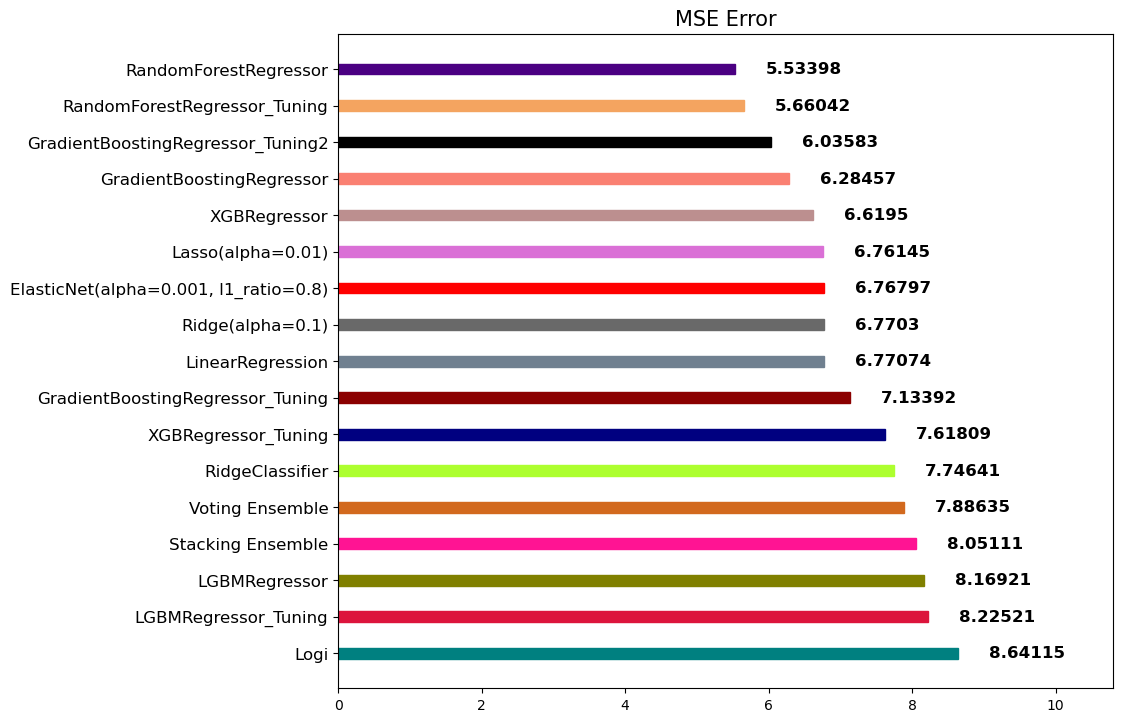

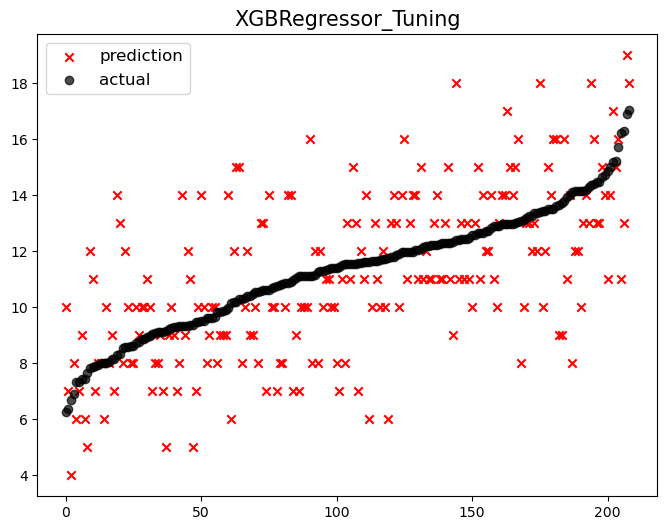

,model,error
0,Logi,8.641148
1,LGBMRegressor_Tuning,8.225206
2,LGBMRegressor,8.169214
3,Stacking Ensemble,8.051110
4,Voting Ensemble,7.886353
5,RidgeClassifier,7.746411
6,GradientBoostingRegressor_Tuning,7.133920
7,LinearRegression,6.770742
8,Ridge(alpha=0.1),6.770299
9,"ElasticNet(alpha=0.001, l1_ratio=0.8)",6.767974


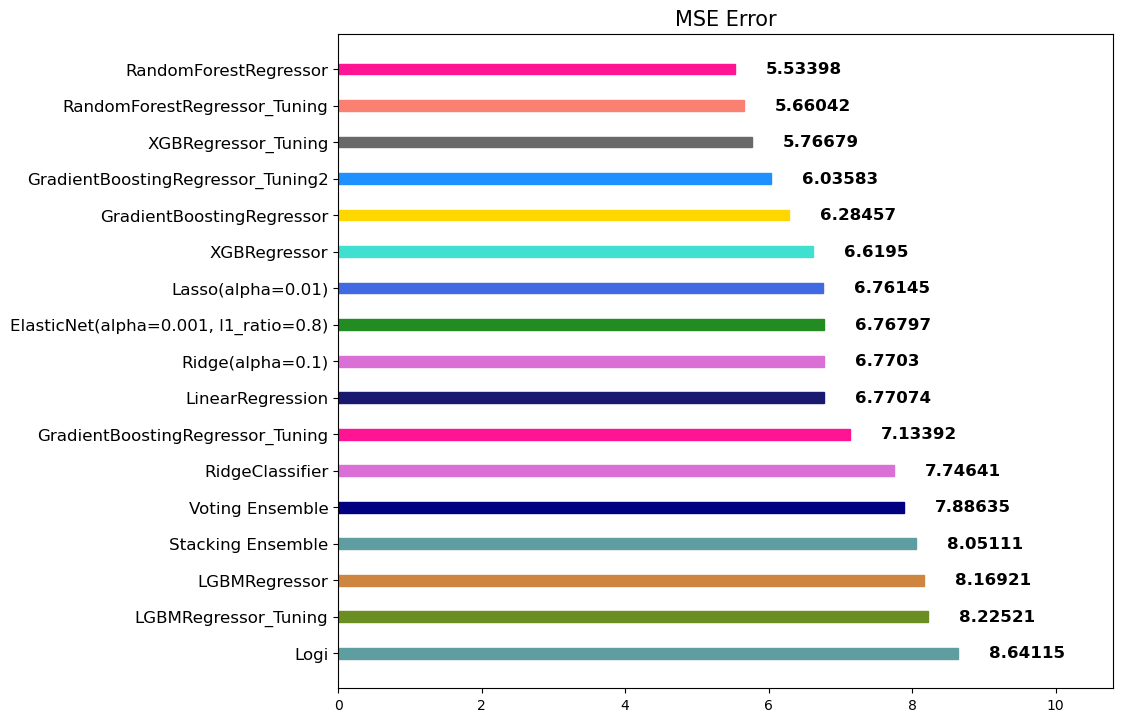

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 20
[LightGBM] [Info] Start training from score 11.241916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

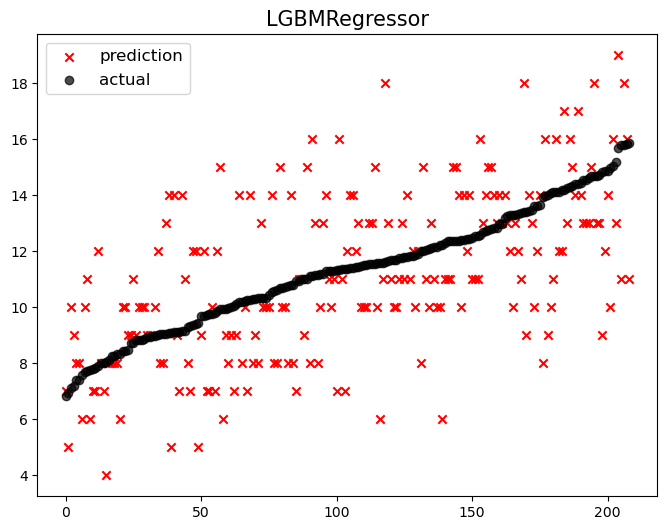

,model,error
0,Logi,8.641148
1,LGBMRegressor_Tuning,8.225206
2,Stacking Ensemble,8.051110
3,Voting Ensemble,7.886353
4,RidgeClassifier,7.746411
5,GradientBoostingRegressor_Tuning,7.133920
6,LinearRegression,6.770742
7,Ridge(alpha=0.1),6.770299
8,"ElasticNet(alpha=0.001, l1_ratio=0.8)",6.767974
9,Lasso(alpha=0.01),6.761451


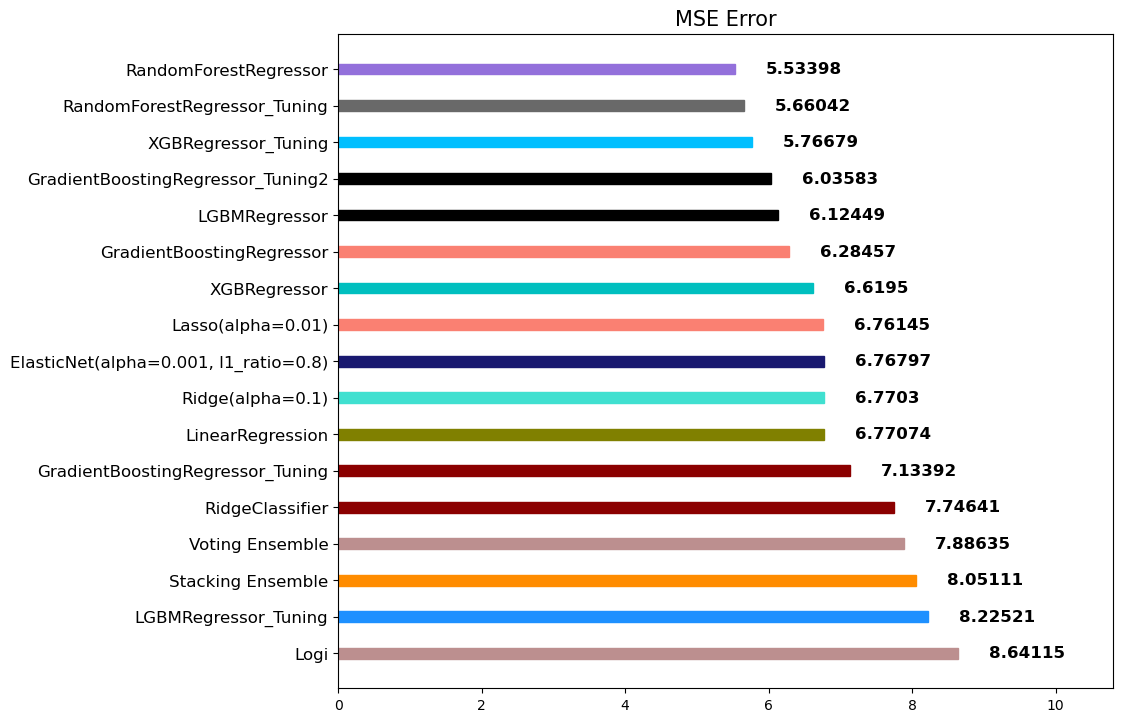

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 835, number of used features: 20
[LightGBM] [Info] Start training from score 11.241916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

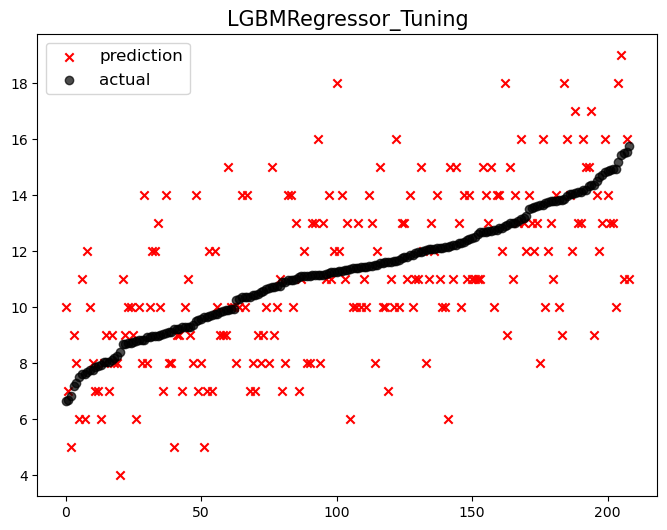

,model,error
0,Logi,8.641148
1,Stacking Ensemble,8.051110
2,Voting Ensemble,7.886353
3,RidgeClassifier,7.746411
4,GradientBoostingRegressor_Tuning,7.133920
5,LinearRegression,6.770742
6,Ridge(alpha=0.1),6.770299
7,"ElasticNet(alpha=0.001, l1_ratio=0.8)",6.767974
8,Lasso(alpha=0.01),6.761451
9,XGBRegressor,6.619498


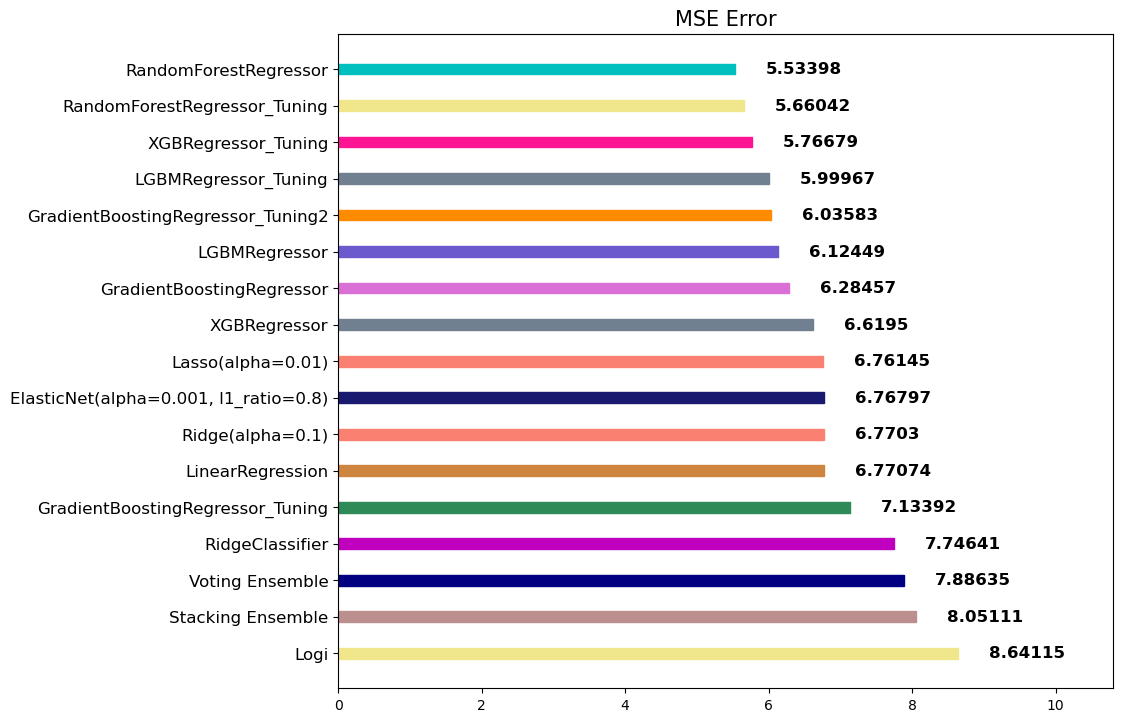

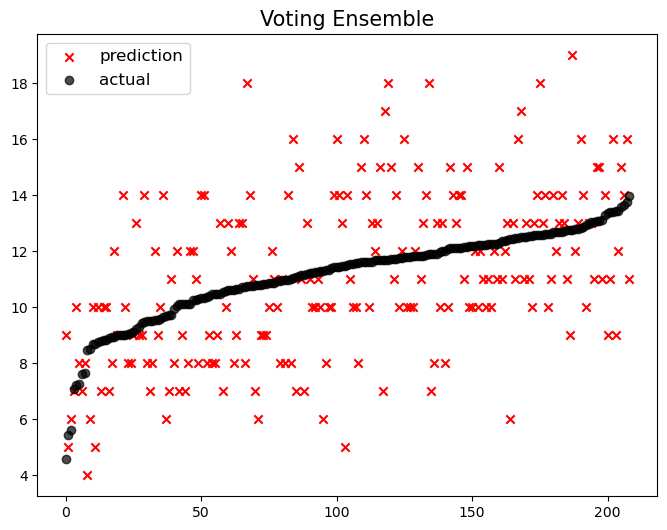

,model,error
0,Logi,8.641148
1,Stacking Ensemble,8.051110
2,RidgeClassifier,7.746411
3,GradientBoostingRegressor_Tuning,7.133920
4,LinearRegression,6.770742
5,Ridge(alpha=0.1),6.770299
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",6.767974
7,Voting Ensemble,6.765832
8,Lasso(alpha=0.01),6.761451
9,XGBRegressor,6.619498


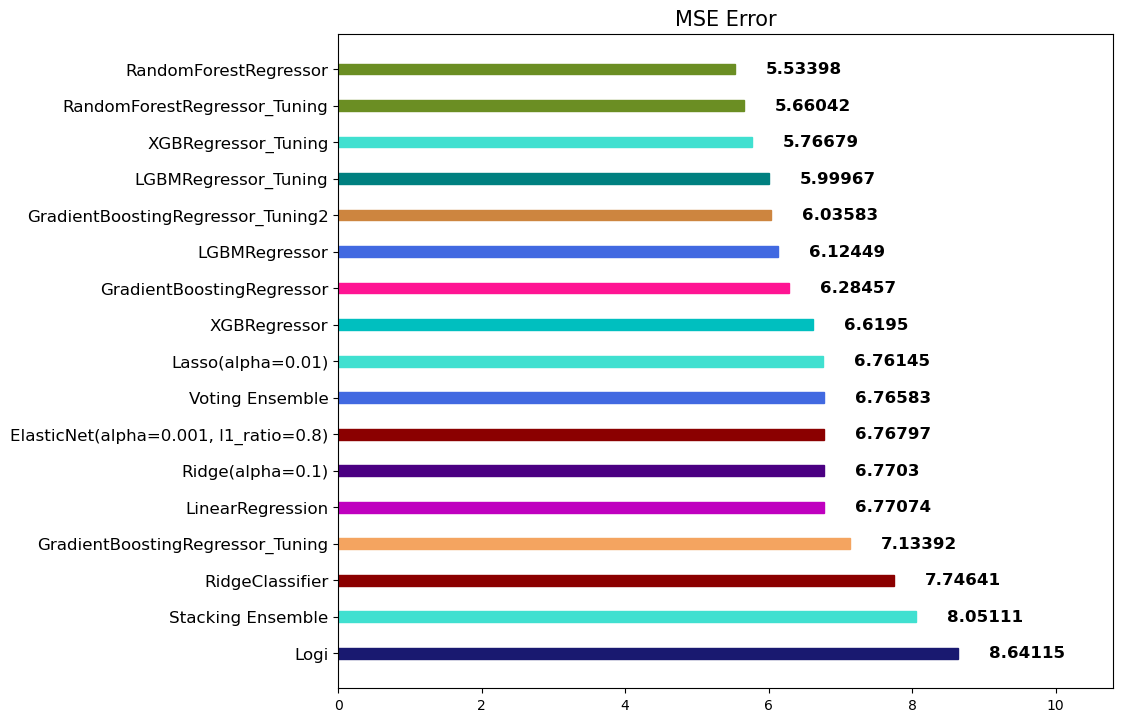

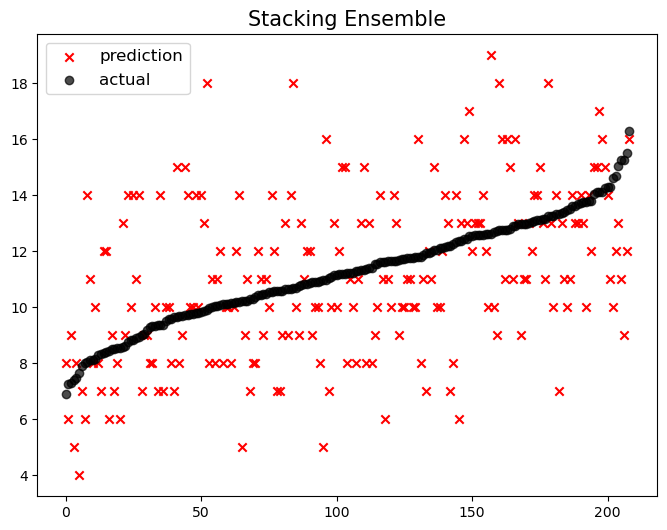

,model,error
0,Logi,8.641148
1,RidgeClassifier,7.746411
2,Stacking Ensemble,7.557968
3,GradientBoostingRegressor_Tuning,7.133920
4,LinearRegression,6.770742
5,Ridge(alpha=0.1),6.770299
6,"ElasticNet(alpha=0.001, l1_ratio=0.8)",6.767974
7,Voting Ensemble,6.765832
8,Lasso(alpha=0.01),6.761451
9,XGBRegressor,6.619498


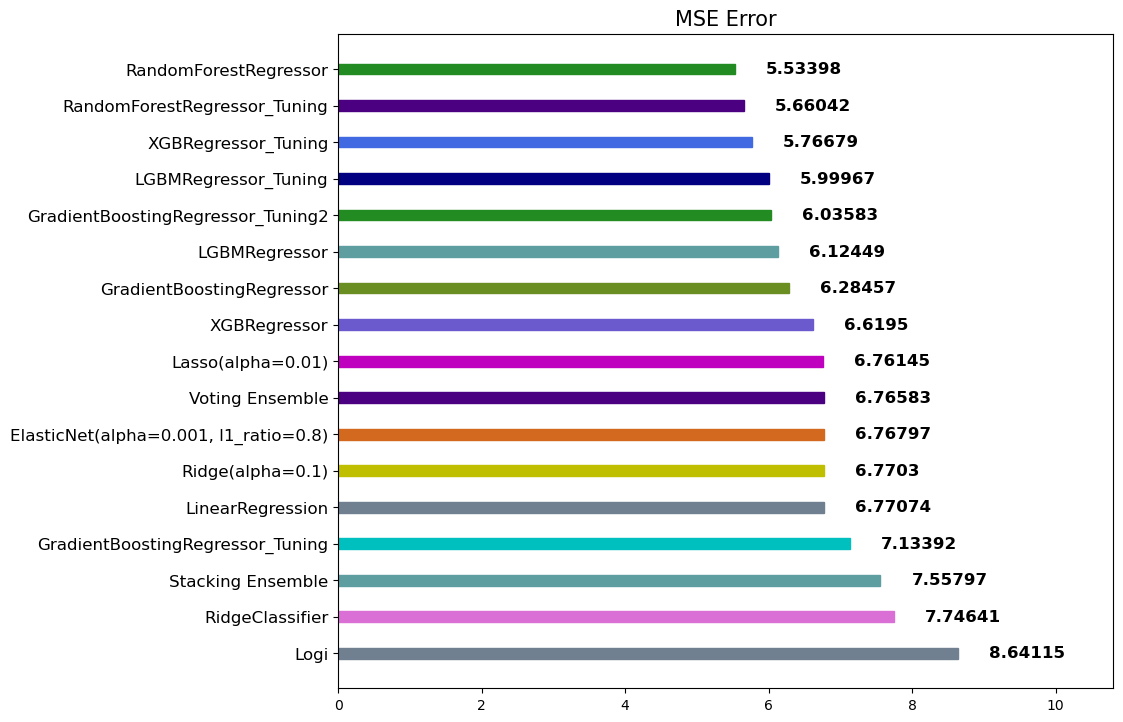

In [19]:
# 경고 메시지 출력 표기 생략
import warnings
import numpy as np
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, precision=3)
SEED = 30
# 그래프 사이즈 설정
from teddynote import utils
utils.set_plot_options(figsize=(8, 6))
# MSE 에러 설정
utils.set_plot_error('mse')

X=merged_df.drop(columns = ["G1","health","Dalc","Walc","internet","reason","Mjob","Medu","school","sex","age"])
y = merged_df["G1"]

X = pd.get_dummies(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import StackingRegressor

# 모델들 및 매개변수 설정
models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge(alpha=0.1)', Ridge(alpha=0.1)),
    ('Lasso(alpha=0.01)', Lasso(alpha=0.01)),
    ('ElasticNet(alpha=0.001, l1_ratio=0.8)', ElasticNet(alpha=0.001, l1_ratio=0.8)),
    ('Logi', LogisticRegression()),
    ('RidgeClassifier', RidgeClassifier()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('RandomForestRegressor_Tuning', RandomForestRegressor(random_state=SEED, n_estimators=1500, max_depth=9, max_features=0.9)),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('GradientBoostingRegressor_Tuning', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01)),
    ('GradientBoostingRegressor_Tuning2', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)),
    ('XGBRegressor', XGBRegressor()),
    ('XGBRegressor_Tuning', XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7)),
    ('LGBMRegressor', LGBMRegressor()),
    ('LGBMRegressor_Tuning', LGBMRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1))
]

# 각 모델에 대한 반복문
for model_name, model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    # 예측 결과 시각화
    utils.plot_error(model_name, pred, y_test)

# VotingRegressor 앙상블
single_models = [
    ('linear_reg', LinearRegression()),
    ('ridge', Ridge(alpha=0.1)),
    ('lasso', Lasso(alpha=0.01)),
    ('elasticnet_pipeline', make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.8)))
]
voting_regressor = VotingRegressor(single_models)
voting_regressor.fit(X_train, y_train)
voting_pred = voting_regressor.predict(X_test)
utils.plot_error('Voting Ensemble', voting_pred, y_test)

# StackingRegressor 앙상블
stack_models = [
    ('elasticnet', make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.8))), 
    ('randomforest', RandomForestRegressor(random_state=SEED, n_estimators=1500, max_depth=9, max_features=0.9)), 
    ('gbr', GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)),
    ('lgbm', LGBMRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1))
]
stack_reg = StackingRegressor(stack_models, final_estimator=XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7), n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)
utils.plot_error('Stacking Ensemble', stack_pred, y_test)


In [23]:
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LGBMRegressor
Random = RandomForestRegressor()

Random.fit(X_train, y_train)

y_pred = Random.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('acc Score:',Random.score(X_test, y_pred) )
y_train_pred = Random.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Train MSE:", mse_train)

R^2 Score: 0.36805105181038156
Mean Squared Error: 5.596497408985126
Root Mean Squared Error: 2.3656917400593693
acc Score: 1.0
Train MSE: 1.0151707228179696
